This Project will cover how to use built-in Python libraries to perform web scrapping, carry out text transformation, and build a recommendation system. It will make you understand how to create your own dataset and further build a content-based recommendation system.

The purpose of Data Science (DS) and Artificial Intelligence (AI) is to add value to a business by utilizing data and applying applicable programming skills. In recent years, Netflix, Amazon, Uber Eats, and other companies have made it possible for people to avail certain commodities with only a few clicks while sitting at home. However, in order to provide users with the most authentic experience possible, these platforms have developed recommendation systems that provide users with a variety of options based on their interests and preferences.

In general, recommendation systems are algorithms that curate data and provide consumers with appropriate material. There are three main types of recommendation engines:  

1) Collaborative filtering: Collaborative filtering collects data regarding user behavior, activities, and preferences to predict what a person will like, based on their similarity to other users. 

2) Content-based filtering: This algorithms analyze the possibility of objects being related to each other using statistics, and then offers possible outcomes to the user based on the highest probabilities. 

3) Hybrid of the two. In a hybrid recommendation engine, natural language processing tags can be generated for each product or item (movie, song), and vector equations are used to calculate the similarity of products. 

Outline: 

In this project, we will walk through the process of scraping a web page for data and using it to develop a recommendation system, using built-in python libraries. Scraping the website to extract useful data will be the first component of the project. Moving on, text transformation will be performed to alter the extracted data and make it appropriate for our recommendation system to use. Finally, our content-based recommender system will calculate the cosine similarity of each blog with the rest of the blogs and then suggest three comparable blogs for each blog post. 

### First Step: Web Scrapping: 

The purpose of going through the web scrapping process is to understand how to automate data entry for a recommender system. Knowing how to extract data from the internet will allow you to develop skills to create your own dataset using an entire webpage. Now, let us perform web scraping on the blogs page of online.datasciencedojo.com. In the blogs section, we will extract relevant information to make up our dataset. From the first page, we will extract the URL, name, and description of each blog. By extracting the URL, we will have access to redirect our algorithm to each blog page and extract the name and description from the metadata. 

The code below uses multiple python libraries and extracts all the URLs from the first page. In this case, it will return ten URLs. For building better concepts regarding web scrapping, I would suggest exploring and playing with these libraries to better understand their functionalities. 

Note: The for loop is used to extract URLs from multiple pages. 

In [1]:
import requests
import lxml.html
from lxml import objectify
from bs4 import BeautifulSoup
#List for storing urls
urls_final = []
#Extract the metadata of the page
for i in range(1):
    url = 'https://online.datasciencedojo.com/blogs/?blogpage='+str(i)
    reqs = requests.get(url)
    soup = BeautifulSoup(reqs.text, 'lxml')
    #Temporary lists for storing temporary data
    urls_temp_1 = []
    urls_temp_2=[]
    temp=[]
    #From the metadata, get the relevant information.
    for h in soup.find_all('a'):
        a = h.get('href')
        urls_temp_1.append(a)
    for i in urls_temp_1:
        if i != None :
            if 'blogs' in i:
                if 'blogpage' in i:
                    None
                else:
                    if 'auth' in i:
                        None
                    else:
                        urls_temp_2.append(i)
    [temp.append(x) for x in urls_temp_2 if x not in temp]
    for i in temp:
        if i=='https://online.datasciencedojo.com/blogs/':
            None
        else:
            urls_final.append(i)
    print(urls_final)

['https://online.datasciencedojo.com/blogs/build-recommendation-system-using-python-libraries/', 'https://online.datasciencedojo.com/blogs/types-of-statistical-distributions-in-ml/', 'https://online.datasciencedojo.com/blogs/regular-expresssion-101/', 'https://online.datasciencedojo.com/blogs/python-libraries-for-data-science/', 'https://online.datasciencedojo.com/blogs/shareable-data-quotes/', 'https://online.datasciencedojo.com/blogs/machine-learning-roadmap/', 'https://online.datasciencedojo.com/blogs/employee-retention-analytics/', 'https://online.datasciencedojo.com/blogs/jupyter-hub-cloud/', 'https://online.datasciencedojo.com/blogs/communication-data-visualization/', 'https://online.datasciencedojo.com/blogs/tracking-metrics-with-prometheus/']


Once we have the URLs, we move towards processing the metadata of each blog for extracting their name and description. 

In [2]:
#Getting the name and description
name=[]
descrip_temp=[]
#Now use each url to get the metadata of each blog post
for j in urls_final:
    url = j
    response = requests.get(url)
    soup = BeautifulSoup(response.text)
    #Extract the name and description from each blog
    metas = soup.find_all('meta')
    name.append([ meta.attrs['content'] for meta in metas if 'property' in meta.attrs and meta.attrs['property'] == 'og:title' ])
    descrip_temp.append([ meta.attrs['content'] for meta in metas if 'name' in meta.attrs and meta.attrs['name'] == 'description' ])
print(name[0])
print(descrip_temp[0])

['Building a Recommendation System Using Python']
['This blog will cover how to\r\nuse built-in Python libraries to perform web scrapping, carry out text\r\ntransformation, and build a recommendation system.\xa0 It will teach you how\r\nto create your own dataset and further build a content-based recommendation system.']


#### Second Step: Text Transformation: 
Similar to any task involving text, exploratory data analysis (EDA) is a fundamental part of any algorithm.  In order to prepare data for our recommender system, data must be cleaned and transformed. For this purpose, we will be using built-in python libraries to remove stop words and transform data. The code below uses the regex library to perform text transformation by removing punctuations, emojis, and more. Furthermore, we have imported a natural language toolkit (nlkt) to remove stop words.  

Note: Stop words are a set of commonly used words in a language. Examples of stop words in English are “a”, “the”, “is”, “are” etc. They are so frequently used in the text that they hold a minimal amount of useful information.

In [3]:
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")
import re
#Removing stop words and cleaning data
stop_words = set(stopwords.words("english"))
descrip=[]
for i in descrip_temp:
    for j in i:
        text = re.sub("@\S+", "", j)
        text = re.sub(r'[^\w\s]', '', text)
        text = re.sub("\$", "", text)
        text = re.sub("@\S+", "", text)
        text = text.lower()
    descrip.append(text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SHREE\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Following this, we will be creating a bag of words. If you are not familiar with it, a bag of words is a representation of text that describes the occurrence of words within a document. It involves two things: A vocabulary of known words, and a measure of the presence of those words. For our data, it will represent all the keywords words in the dataset and calculate which words are used in each blog and the number of occurrences they have. The code below uses a built-in function to extract keywords.

In [4]:
from keras.preprocessing.text import Tokenizer
#Building BOW
model = Tokenizer()
model.fit_on_texts(descrip)
bow = model.texts_to_matrix(descrip, mode='count')
bow_keys=f'Key : {list(model.word_index.keys())}'

The code below assigns each keyword an index value and calculates the frequency of each word being used per blog. When building a recommendation system, these keywords and their frequencies for each blog will act as the input. Based on similar keywords, our algorithm will link blog posts together into similar categories. In this case, we will have 10 blogs converted into rows and 139 keywords converted into columns.

In [5]:
import pandas as pd
#Creating df
df_name=pd.DataFrame(name)
df_name.rename(columns = {0:'Blog'}, inplace = True)
df_count=pd.DataFrame(bow)
frames=[df_name,df_count]
result=pd.concat(frames,axis=1)
result=result.set_index('Blog')
result=result.drop([0], axis=1)
for i in range(len(bow)):
    result.rename(columns = {i+1:i}, inplace = True)
result

,0,1,2,3,4,5,6,7,8,9,...,165,166,167,168,169,170,171,172,173,174
Blog,,,,,,,,,,,,,,,,,,,,,
Building a Recommendation System Using Python,0.0,2.0,0.0,1.0,2.0,2.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7 Types of Statistical Distributions with Examples,1.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
RegEx 101 - beginner’s guide to understand regular expressions,0.0,0.0,0.0,1.0,0.0,4.0,1.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6 Awesome Python Libraries for Data Science for 2022,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Shareable Data Quotes,7.0,2.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Machine Learning Roadmap: Where to Start and How to Succeed,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Employee retention using R programming language,2.0,4.0,5.0,2.0,2.0,1.0,2.0,1.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Coding in the cloud with Jupyter Hub,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Data visualization: The best way to communicate,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Third Step: Cosine Similarity: 

Whenever we are performing some tasks involving natural language processing and want to estimate the similarity between texts, we use some pre-defined metrics that are famous for providing numerical evaluations for this purpose. These metrics include: 

- Euclidean Distance 

- Cosine Similarity 

- Jaccard Similarity 

- Pearson Similarity

While all four of them can be used to evaluate a similarity index between text documents, we will be using cosine similarity for our task. Cosine similarity, in data analysis, measures the similarity between two vectors of an inner product space. It is often used to measure document similarity in text analysis.It measures the cosine of the angle between two vectors and determines a numerical value indicating the probability of those vectors being in the same direction. The code alongside the heatmap shown below visualizes the cosine similarity index for all the blogs. 

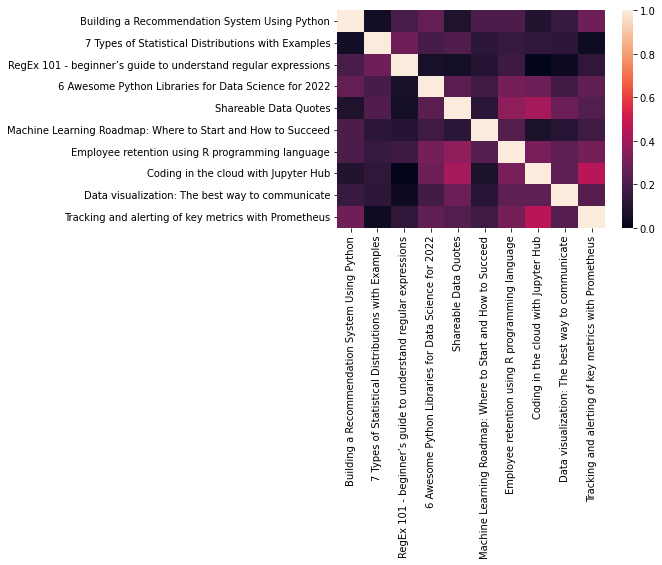

In [6]:
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
#Calculating cosine similarity
df_name=df_name.convert_dtypes(str)
temp_df=df_name['Blog']
sim_df = pd.DataFrame(cosine_similarity(result, dense_output=True))
for i in range(len(name)):
    sim_df.rename(columns = {i:temp_df[i]},index={i:temp_df[i]}, inplace = True)
ax = sns.heatmap(sim_df)

#### Fourth Step: Evaluation: 

In the code below, our recommender system will extract the three most similar blogs for each blog using Pandas DataFrame. 

Note: For each blog, the blog itself is also recommended because it was calculated to be the most similar blog, with the maximum cosine similarity index, 1.

In [18]:
#Calculating cosine similarity
df_name=df_name.convert_dtypes(str)
a=df_name['Blog']
sim_df = pd.DataFrame(cosine_similarity(result, dense_output=True))
for i in range(len(name)):
    sim_df.rename(columns = {i:a[i]},index={i:a[i]}, inplace = True)
    sim_df

import numpy as np    
max_val = sim_df.apply(lambda x: pd.Series(np.concatenate([x.nlargest(11).index.values])), axis=1)
max_val
max_val.to_csv('E:/Suggested Blogs.csv',index=True)

,0,1,2,3,4,5,6,7,8,9
Building a Recommendation System Using Python,Building a Recommendation System Using Python,Tracking and alerting of key metrics with Prom...,6 Awesome Python Libraries for Data Science fo...,Machine Learning Roadmap: Where to Start and H...,Employee retention using R programming language,RegEx 101 - beginner’s guide to understand reg...,Data visualization: The best way to communicate,Coding in the cloud with Jupyter Hub,Shareable Data Quotes,7 Types of Statistical Distributions with Exam...
7 Types of Statistical Distributions with Examples,7 Types of Statistical Distributions with Exam...,RegEx 101 - beginner’s guide to understand reg...,Shareable Data Quotes,6 Awesome Python Libraries for Data Science fo...,Employee retention using R programming language,Coding in the cloud with Jupyter Hub,Data visualization: The best way to communicate,Machine Learning Roadmap: Where to Start and H...,Building a Recommendation System Using Python,Tracking and alerting of key metrics with Prom...
RegEx 101 - beginner’s guide to understand regular expressions,RegEx 101 - beginner’s guide to understand reg...,7 Types of Statistical Distributions with Exam...,Building a Recommendation System Using Python,Employee retention using R programming language,Tracking and alerting of key metrics with Prom...,Machine Learning Roadmap: Where to Start and H...,6 Awesome Python Libraries for Data Science fo...,Shareable Data Quotes,Data visualization: The best way to communicate,Coding in the cloud with Jupyter Hub
6 Awesome Python Libraries for Data Science for 2022,6 Awesome Python Libraries for Data Science fo...,Employee retention using R programming language,Coding in the cloud with Jupyter Hub,Building a Recommendation System Using Python,Tracking and alerting of key metrics with Prom...,Shareable Data Quotes,7 Types of Statistical Distributions with Exam...,Data visualization: The best way to communicate,Machine Learning Roadmap: Where to Start and H...,RegEx 101 - beginner’s guide to understand reg...
Shareable Data Quotes,Shareable Data Quotes,Coding in the cloud with Jupyter Hub,Employee retention using R programming language,Data visualization: The best way to communicate,6 Awesome Python Libraries for Data Science fo...,Tracking and alerting of key metrics with Prom...,7 Types of Statistical Distributions with Exam...,Machine Learning Roadmap: Where to Start and H...,Building a Recommendation System Using Python,RegEx 101 - beginner’s guide to understand reg...
Machine Learning Roadmap: Where to Start and How to Succeed,Machine Learning Roadmap: Where to Start and H...,Employee retention using R programming language,Building a Recommendation System Using Python,6 Awesome Python Libraries for Data Science fo...,Tracking and alerting of key metrics with Prom...,7 Types of Statistical Distributions with Exam...,Shareable Data Quotes,Data visualization: The best way to communicate,RegEx 101 - beginner’s guide to understand reg...,Coding in the cloud with Jupyter Hub
Employee retention using R programming language,Employee retention using R programming language,Shareable Data Quotes,Coding in the cloud with Jupyter Hub,6 Awesome Python Libraries for Data Science fo...,Tracking and alerting of key metrics with Prom...,Data visualization: The best way to communicate,Machine Learning Roadmap: Where to Start and H...,Building a Recommendation System Using Python,RegEx 101 - beginner’s guide to understand reg...,7 Types of Statistical Distributions with Exam...
Coding in the cloud with Jupyter Hub,Coding in the cloud with Jupyter Hub,Tracking and alerting of key metrics with Prom...,Shareable Data Quotes,Employee retention using R programming language,6 Awesome Python Libraries for Data Science fo...,Data visualization: The best way to communicate,7 Types of Statistical Distributions with Exam...,Building a Recommendation System Using Python,Machine Learning Roadmap: Where to Start and H...,RegEx 101 - beginner’s guide to understan